In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [5]:
# Get the columns and the rows that are not null.
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
# Get the columns and the rows that are not null.
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [7]:
# Get the data types of each column.
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [8]:
# Get the unique values of the type of city.
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [9]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Urban")

66

In [10]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Suburban")

36

In [11]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Rural")

18

In [12]:
# Get the columns and the rows that are not null.
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [13]:
# Get the columns and the rows that are not null.
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [14]:
# Get the data types of each column.
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [15]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [16]:
fares_per_type=pyber_data_df.groupby(["type"]).sum()["fare"]
drivers_per_type=pyber_data_df.groupby(["type"]).sum()["driver_count"]
riders_per_type=pyber_data_df.groupby(["type"]).count()["ride_id"]

In [17]:
avg_fare_per_ride=fares_per_type/riders_per_type
avg_fare_per_driver=fares_per_type/drivers_per_type

In [18]:
# Making the dataframe
summary_pyber_data_df = pd.merge(riders_per_type, drivers_per_type, how = "left", on=["type"])
summary_pyber_data_df = pd.merge(summary_pyber_data_df, fares_per_type, how = "left", on=["type"])
summary_pyber_data_df["Average Fare per Ride"]= avg_fare_per_ride
summary_pyber_data_df["Average Fare per Driver"]= avg_fare_per_driver
summary_pyber_data_df = summary_pyber_data_df.rename(columns={'ride_id': 'Total Rides', 'driver_count': 'Total Drivers','fare':'Total Fares'})

In [19]:
# Format the columns.
summary_pyber_data_df["Average Fare per Ride"] = summary_pyber_data_df["Average Fare per Ride"].map("${:.2f}".format)
summary_pyber_data_df["Average Fare per Driver"] = summary_pyber_data_df["Average Fare per Driver"].map("${:.2f}".format)
summary_pyber_data_df["Total Rides"] = summary_pyber_data_df["Total Rides"].map("{:,.0f}".format)
summary_pyber_data_df["Total Drivers"]=summary_pyber_data_df["Total Drivers"].map("{:,.0f}".format)
summary_pyber_data_df["Total Fares"]=summary_pyber_data_df["Total Fares"].map("${:,.2f}".format)

summary_pyber_data_df.index.name=None

In [20]:
summary_pyber_data_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,537,"$4,327.93",$34.62,$8.06
Suburban,625,"8,570","$19,356.33",$30.97,$2.26
Urban,"1,625","59,602","$39,854.38",$24.53,$0.67


In [21]:
pyber_data_df = pyber_data_df.rename(columns={'city':'City', 'date':'Date','fare':'Fare', 'ride_id': 'Ride Id','driver_count': 'No. Drivers', 'type':'City Type'})

In [22]:
pyber_data_df

,City,Date,Fare,Ride Id,No. Drivers,City Type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [23]:
pyber_data_df.set_index('Date')

,City,Fare,Ride Id,No. Drivers,City Type
Date,,,,,
2019-01-14 10:14:22,Lake Jonathanshire,13.83,5739410935873,5,Urban
2019-03-04 18:24:09,South Michelleport,30.24,2343912425577,72,Urban
2019-02-24 04:29:00,Port Samanthamouth,33.44,2005065760003,57,Urban
2019-02-10 23:22:03,Rodneyfort,23.44,5149245426178,34,Urban
2019-03-06 04:28:35,South Jack,34.58,3908451377344,46,Urban
...,...,...,...,...,...
2019-04-29 17:04:39,Michaelberg,13.38,8550365057598,6,Rural
2019-01-30 00:05:47,Lake Latoyabury,20.76,9018727594352,2,Rural
2019-02-10 21:03:50,North Jaime,11.11,2781339863778,1,Rural


In [24]:
fares_df= pyber_data_df[["Date","City Type","Fare"]].copy()

In [25]:
fares_df

,Date,City Type,Fare
0,2019-01-14 10:14:22,Urban,13.83
1,2019-03-04 18:24:09,Urban,30.24
2,2019-02-24 04:29:00,Urban,33.44
3,2019-02-10 23:22:03,Urban,23.44
4,2019-03-06 04:28:35,Urban,34.58
...,...,...,...
2370,2019-04-29 17:04:39,Rural,13.38
2371,2019-01-30 00:05:47,Rural,20.76
2372,2019-02-10 21:03:50,Rural,11.11
2373,2019-05-07 19:22:15,Rural,44.94


In [26]:
fares_df.set_index('Date')

,City Type,Fare
Date,,
2019-01-14 10:14:22,Urban,13.83
2019-03-04 18:24:09,Urban,30.24
2019-02-24 04:29:00,Urban,33.44
2019-02-10 23:22:03,Urban,23.44
2019-03-06 04:28:35,Urban,34.58
...,...,...
2019-04-29 17:04:39,Rural,13.38
2019-01-30 00:05:47,Rural,20.76
2019-02-10 21:03:50,Rural,11.11


In [27]:
fares_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2375 entries, 0 to 2374
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2375 non-null   object 
 1   City Type  2375 non-null   object 
 2   Fare       2375 non-null   float64
dtypes: float64(1), object(2)
memory usage: 74.2+ KB


In [28]:
fares_df['Date']= pd.to_datetime(fares_df['Date']) 

In [29]:
fares_df.set_index('Date')

,City Type,Fare
Date,,
2019-01-14 10:14:22,Urban,13.83
2019-03-04 18:24:09,Urban,30.24
2019-02-24 04:29:00,Urban,33.44
2019-02-10 23:22:03,Urban,23.44
2019-03-06 04:28:35,Urban,34.58
...,...,...
2019-04-29 17:04:39,Rural,13.38
2019-01-30 00:05:47,Rural,20.76
2019-02-10 21:03:50,Rural,11.11


In [30]:
fares_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2375 entries, 0 to 2374
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2375 non-null   datetime64[ns]
 1   City Type  2375 non-null   object        
 2   Fare       2375 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 74.2+ KB


In [31]:
sum_fare_by_city_and_date = fares_df.groupby(['City Type','Date']).sum()["Fare"]
sum_fare_by_city_and_date = pd.DataFrame(sum_fare_by_city_and_date)

In [32]:
sum_fare_by_city_and_date

Fare
City Type Date                      
Rural     2019-01-01 09:45:36  43.69
          2019-01-02 11:18:32  52.12
          2019-01-03 19:51:01  19.90
          2019-01-04 03:31:26  24.88
          2019-01-06 07:38:40  47.33
...                              ...
Urban     2019-05-08 04:20:00  21.99
          2019-05-08 04:39:49  18.45
          2019-05-08 07:29:01  18.55
          2019-05-08 11:38:35  19.77
          2019-05-08 13:10:18  18.04

[2375 rows x 1 columns]

In [33]:
CityType_to_date_df = pd.pivot_table(sum_fare_by_city_and_date, index="Date", columns='City Type')

In [34]:
CityType_to_date_df = CityType_to_date_df.loc['2019-01-01':'2019-04-28']

In [35]:
CityType_to_date_df

Fare                
City Type           Rural Suburban  Urban
Date                                     
2019-01-01 00:08:16   NaN      NaN  37.91
2019-01-01 00:46:46   NaN    47.74    NaN
2019-01-01 02:07:24   NaN    24.07    NaN
2019-01-01 03:46:50   NaN      NaN   7.57
2019-01-01 05:23:21   NaN      NaN  10.75
...                   ...      ...    ...
2019-04-28 14:28:36   NaN      NaN  11.46
2019-04-28 16:29:16   NaN      NaN  36.42
2019-04-28 17:26:52   NaN      NaN  31.43
2019-04-28 17:38:09   NaN    34.87    NaN
2019-04-28 19:35:03   NaN    16.96    NaN

[2196 rows x 3 columns]

In [36]:
Month_vs_fare_df = pd.DataFrame(CityType_to_date_df)
Month_vs_fare_df=Month_vs_fare_df.resample('W').sum()["Fare"]
Month_vs_fare_df

City Type,Rural,Suburban,Urban
Date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


In [47]:
import matplotlib.pyplot as plt

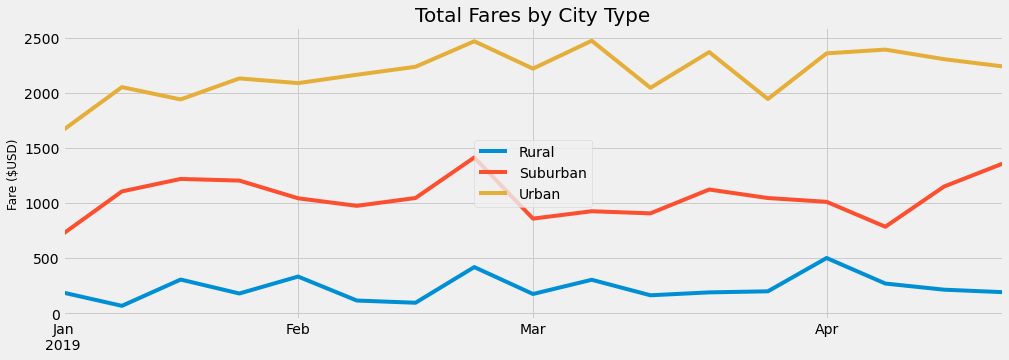

In [54]:
plt.style.use('fivethirtyeight')
Month_vs_fare_df.plot(figsize=(15,5))
# Incorporate the other graph properties
plt.title("Total Fares by City Type", fontsize=20)
plt.ylabel("Fare ($USD)", fontsize=12)
plt.xlabel(None)
plt.legend(loc='center')
plt.savefig("analysis/Fig8.png")
plt.show()